<a href="https://colab.research.google.com/github/johnhallman/ctsb/blob/add_colab_notebooks/notebooks/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install jaxlib


# The Problem class
The Problem class is the abstraction used to implement control and time series tasks. CTSB comes pre-loaded with several classical problems (both simulated and real world data) such as ARMA time series or linear dynamical systems. Below we demonstrate how to initialize a problem and step through the simulated time series generated by an ARMA. We can also query the hidden state of the system.


(DeviceArray([0.47781923, 0.05928222, 0.15275976], dtype=float32), DeviceArray([ 0.33635113,  0.31897387, -0.00450881], dtype=float32))


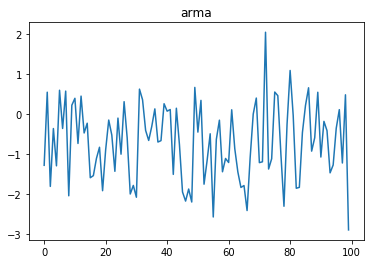

In [13]:
import ctsb
from ctsb.problems.simulated.arma import ARMA
import jax.numpy as np
import matplotlib.pyplot as plt

T = 100
p, q = 3, 3
problem = ARMA()
problem.initialize(p,q)
test_output = []
for t in range(T):
    test_output.append(problem.step())

info = problem.hidden()
print(info)

plt.plot(test_output)
plt.title("arma")
plt.show(block=False)


The help() method provides more info about the API of a certain Problem class.

In [0]:
problem.help()

# The Model Class
The Model class is the abstraction used to implement models/predictors for the problems. CTSB is designed so that the Model and Problem classes can be combined in a modular fashion. Roughly speaking, the goal of CTSB is to be able to test an arbitrary model on an arbitrary problem. For example, below we show how to combine a basic last-value model (a predictor that just outputs the previous observation) for time series on the ARMA problem.